In [6]:
import os
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torch.nn.functional import softmax
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig
from netrep.metrics import LinearMetric, GaussianStochasticMetric, EnergyStochasticMetric

# My code. 
import generators

PROMPT = "Once upon a time"
TEMPERATURE = 1
NUM_EXPERIMENTS = 5
NUM_TOKENS = 20

# Load in the model
model_1m = AutoModelForCausalLM.from_pretrained('/Users/joshstallings/Desktop/LipshutzLab/TinyStories-1M')
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125M")
model_1m.eval()

model_1m.transformer.h[-1]

GPTNeoBlock(
  (ln_1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (attn): GPTNeoAttention(
    (attention): GPTNeoSelfAttention(
      (attn_dropout): Dropout(p=0.0, inplace=False)
      (resid_dropout): Dropout(p=0.0, inplace=False)
      (k_proj): Linear(in_features=64, out_features=64, bias=False)
      (v_proj): Linear(in_features=64, out_features=64, bias=False)
      (q_proj): Linear(in_features=64, out_features=64, bias=False)
      (out_proj): Linear(in_features=64, out_features=64, bias=True)
    )
  )
  (ln_2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (mlp): GPTNeoMLP(
    (c_fc): Linear(in_features=64, out_features=256, bias=True)
    (c_proj): Linear(in_features=256, out_features=64, bias=True)
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.0, inplace=False)
  )
)

In [ ]:
temperatures = np.linspace(0, 2, num=5)

NUM_EXPERIMENTS = len(temperatures)
# Entries are of shape [ activations, token_responses]
# where activations and token_responses are of size 800
trials = np.empty( (len(temperatures), len(PROMPT), 64) )

for t in temperatures:
    activation_responses, token_responses = generators.generate(model_1m, "1m", tokenizer, PROMPT, NUM_TOKENS, 
                                                                t, -1)

# THIS IS TO HELP ME REMEMBER THE LAYOUT OF THIS MATRIX
# print(len(activation_responses)) # Number of experiments
# print(len(activation_responses[0])) # Number of tokens
# print(len(activation_responses[0][0])) # == 2, something about the output
# print(activation_responses[0][19][0].shape) # [1, <token>, 64]
# print(activation_responses[0][0][1].shape) # [1, 16, 6, 6]

for i in range(NUM_EXPERIMENTS):
    print(activation_responses[i][-1][0][0][-1].shape) #
    print(f"{len(token_responses[i])}")


folder_name = "ranging_temperature_across_k_seeds"

experiment_name = "experiment0"
if(not os.path.isdir(folder_name)):
    os.mkdir(f"{folder_name}")
np.save(f"{folder_name}{os.sep}{experiment_name}.npy", trials)
with open(f"{folder_name}{os.sep}{experiment_name}.txt", "w") as f:
    for token_response in token_responses:
        f.write(str(token_response)+"\n")


torch.Size([23, 64])
24
torch.Size([23, 64])
24
torch.Size([23, 64])
24
torch.Size([23, 64])
24
torch.Size([23, 64])
24


In [5]:
for response in token_responses:
    print(f"{tokenizer.decode(response)}")

Once upon a time, there was a small boy named Timmy. He lived in a big, green field with many


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

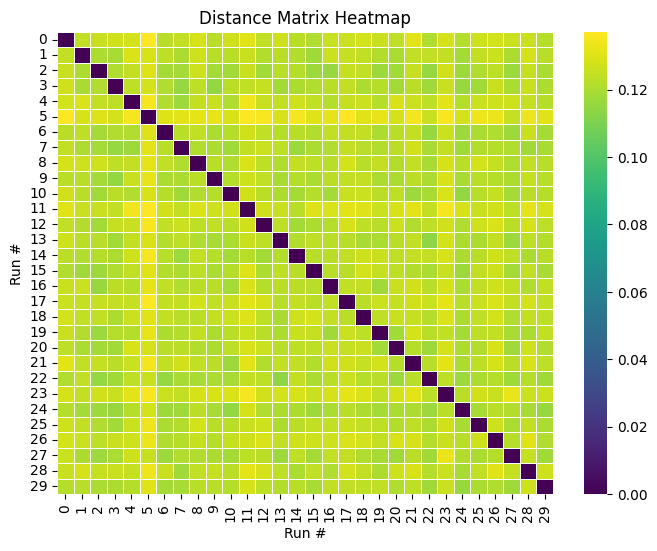

In [25]:
# alpha = 0  => linearly invariant, like CCA
# alpha = 1 => rotationally invariant, only rotational alignments. 
metric = LinearMetric(alpha=0.5)
dist_matrix_1, _ = metric.pairwise_distances(tensors_3m[:30], verbose=False)
# dist_matrix_2, _  = metric.pairwise_distances(tensor_2s)  # these aren't 2d arrays need to figure that out

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(dist_matrix_1, cmap='viridis', annot=False, fmt=".2f", linewidths=.5)

plt.title('Distance Matrix Heatmap')
plt.xlabel('Run #')
plt.ylabel('Run #')
plt.show()


In [150]:
metric = EnergyStochasticMetric()
dist_matrix_1, _ = metric.pairwise_distances(tensor_1s, verbose=False)
# dist_matrix_2, _  = metric.pairwise_distances(tensor_2s)  # these aren't 2d arrays need to figure that out

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(dist_matrix_1, cmap='viridis', annot=False, fmt=".2f", linewidths=.5)

plt.title('Distance Matrix Heatmap')
plt.xlabel('Run #')
plt.ylabel('Run #')
plt.show()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

KeyboardInterrupt: 